In [130]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from matplotlib import colors
import matplotlib
import pylab as pl
import pandas as pd
%matplotlib inline

In [131]:
## Cleaning the data to fill replace NA fields with zeroes
data = pd.read_csv(r'C:\Users\PB\Downloads\pywork\kmeans\cars.csv')
data = data.fillna(0)
data.brand = pd.Categorical(data.brand)
## converting the string brand into a categorical variable
data['brand_categorical_variable'] = data.brand.cat.codes

In [132]:
features_to_be_included = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year' ,
                           'brand_categorical_variable' ]
data = data[features_to_be_included]
data[:2]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand_categorical_variable
0,14.0,8,350.0,165,4209.0,12,1972,2
1,31.9,4,89.0,71,1925.0,14,1980,0


In [140]:
from matplotlib.patches import Ellipse
import numpy as np
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
        
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

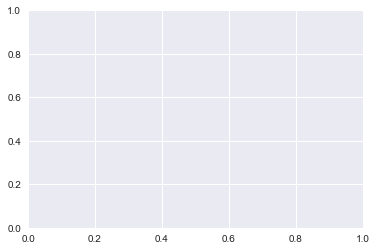

In [141]:
plt.gca()

In [152]:
from  sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5,covariance_type='full',verbose=1,verbose_interval=10,max_iter=5000).fit(data.values)
labels = gmm.predict(data.values)
labels

Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True


array([3, 0, 3, 3, 0, 3, 3, 3, 4, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 2,
       1, 3, 0, 0, 0, 3, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 3, 1, 1, 3, 1, 1,
       4, 0, 3, 2, 0, 1, 3, 4, 3, 0, 3, 3, 2, 0, 0, 3, 1, 0, 4, 0, 3, 1,
       0, 0, 0, 3, 1, 0, 0, 2, 0, 4, 1, 2, 0, 0, 3, 3, 3, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 3, 1, 0, 1, 3, 1, 3, 1, 3, 3, 0, 0, 0, 2, 0, 0, 2, 3,
       0, 0, 3, 0, 0, 1, 2, 1, 0, 3, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 0, 2,
       3, 3, 3, 3, 0, 3, 0, 0, 1, 0, 2, 0, 3, 0, 1, 2, 3, 3, 0, 2, 3, 1,
       0, 1, 2, 0, 1, 4, 2, 3, 1, 1, 0, 3, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       3, 3, 3, 0, 1, 0, 3, 3, 0, 1, 1, 3, 3, 3, 2, 2, 3, 3, 3, 0, 2, 0,
       0, 0, 0, 2, 4, 1, 2, 3, 0, 1, 3, 2, 2, 4, 0, 0, 1, 0, 0, 3, 1, 3,
       1, 2, 3, 4, 3, 0, 3, 0, 1, 2, 3, 0, 2, 3, 0, 0, 3, 1, 0, 2, 3, 1,
       3, 0, 3, 3, 3, 0, 0, 2, 0, 0, 4, 3, 1, 2, 3, 0, 1, 1, 1],
      dtype=int64)

In [153]:
test_features= ['mpg','time-to-60']
X = data[test_features].values
X

array([[14. , 12. ],
       [31.9, 14. ],
       [17. , 11. ],
       [15. , 10. ],
       [30.5, 17. ],
       [23. , 17. ],
       [13. , 13. ],
       [14. ,  9. ],
       [25.4, 20. ],
       [37.7, 17. ],
       [34. , 17. ],
       [34.3, 16. ],
       [16. , 14. ],
       [11. , 11. ],
       [19.1, 19. ],
       [16.9, 15. ],
       [31.8, 19. ],
       [16. , 12. ],
       [24. , 16. ],
       [24. , 15. ],
       [37.2, 16. ],
       [21.5, 13. ],
       [24. , 18. ],
       [15.5, 14. ],
       [38.1, 19. ],
       [33. , 17. ],
       [31. , 19. ],
       [14. , 14. ],
       [18. , 21. ],
       [29.9, 21. ],
       [27. , 15. ],
       [16. , 18. ],
       [23. , 15. ],
       [21. , 15. ],
       [30. , 16. ],
       [22.4, 16. ],
       [26. , 21. ],
       [21.5, 14. ],
       [16.5, 13. ],
       [20.2, 18. ],
       [16. , 19. ],
       [14. , 16. ],
       [18.5, 16. ],
       [17.5, 16. ],
       [14. , 10. ],
       [31.6, 18. ],
       [13. , 14. ],
       [22. ,

Initialization 0
  Iteration 0
Initialization converged: True


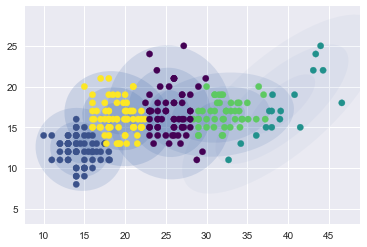

In [154]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');
plot_gmm(gmm,X)

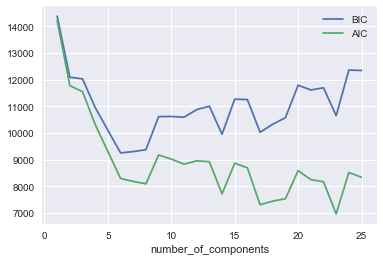

In [167]:
gmm_models  = [GaussianMixture(n_components=i,covariance_type='full',max_iter=500).fit(data.values) for i in range(1,26)] 

n_components = [i for i in range(1,26)]
plt.plot(n_components, [m.bic(data.values) for m in gmm_models], label='BIC')
plt.plot(n_components, [m.aic(data.values) for m in gmm_models], label='AIC')
plt.legend(loc='best')
plt.xlabel('number_of_components');

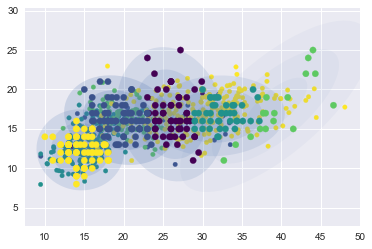

In [170]:
#density estimation using GMM as generator
gmm = GaussianMixture(n_components=5,covariance_type='full', random_state=0)
model = gmm.fit(data.values)
(genX, genY) = model.sample(500)
plt.scatter(genX[:,0], genX[:,5],c=genY,s=20,cmap='viridis')
test_features= ['mpg','time-to-60']
X = data[test_features].values
plot_gmm(gmm,X)